In [2]:
%matplotlib inline

In [7]:
import astra
import numpy as np
import pylab as plt
import os
import glob
import scipy.ndimage
import skimage.segmentation
import matplotlib
font = {'size'   : 18}
matplotlib.rc('font', **font)

In [8]:
def log_progress(sequence, every=None, size=None):
    from ipywidgets import IntProgress, HTML, VBox
    from IPython.display import display

    is_iterator = False
    if size is None:
        try:
            size = len(sequence)
        except TypeError:
            is_iterator = True
    if size is not None:
        if every is None:
            if size <= 200:
                every = 1
            else:
                every = size / 200     # every 0.5%
    else:
        assert every is not None, 'sequence is iterator, set every'

    if is_iterator:
        progress = IntProgress(min=0, max=1, value=1)
        progress.bar_style = 'info'
    else:
        progress = IntProgress(min=0, max=size, value=0)
    label = HTML()
    box = VBox(children=[label, progress])
    display(box)

    index = 0
    try:
        for index, record in enumerate(sequence, 1):
            if index == 1 or index % every == 0:
                if is_iterator:
                    label.value = '{index} / ?'.format(index=index)
                else:
                    progress.value = index
                    label.value = u'{index} / {size}'.format(
                        index=index,
                        size=size
                    )
            yield record
    except:
        progress.bar_style = 'danger'
        raise
    else:
        progress.bar_style = 'success'
        progress.value = index
        label.value = unicode(index or '?')

In [9]:
def images_diff(im1, im2):
    assert(im1.shape==im2.shape)
    rec_diff = np.zeros(shape=(im1.shape[0],im1.shape[1],3), dtype='float32')
    im1_t = im1.copy()
    im1_t = (im1_t-im1_t.min())/(im1_t.max()-im1_t.min())
    
    im2_t = im2.copy()
    im2_t = (im2_t-im2_t.min())/(im2_t.max()-im2_t.min())
    
    # nrecon_rec_t[nrecon_rec_t<0] = 0
    diff_rec = im1_t-im2_t
    rec_diff[...,0] = diff_rec*(diff_rec>0)
    rec_diff[...,1] = -diff_rec*(diff_rec<0)
    rec_diff[...,2] = rec_diff[...,1]
    return rec_diff

In [10]:
data_root = '/diskmnt/a/makov/yaivan/MMC_1/'
nrecon_root_folder = os.path.join(data_root,'_tmp','nrecon')
nrecon_folders = glob.glob(os.path.join(nrecon_root_folder, '*'))
nrecon_folders = [nf for nf in nrecon_folders if os.path.isdir(nf)]
print len(nrecon_folders)

160


In [96]:
!ls /diskmnt/a/makov/yaivan/Sand/_tmp/nrecon/bh_0_rc_0

Chieftain_Unc_2.8__pp1.tif	Chieftain_Unc_2.8__rec_spr.bmp
Chieftain_Unc_2.8__pp2.tif	Chieftain_Unc_2.8__sino0980.tif
Chieftain_Unc_2.8__rec0980.png	Chieftain_Unc_2.8__sinoraw_0980.tif
Chieftain_Unc_2.8__rec.log	tomo_config.log


In [8]:
!ls /diskmnt/a/makov/yaivan/MMC_1/_tmp/nrecon/bh_*_rc_0

/diskmnt/a/makov/yaivan/MMC_1/_tmp/nrecon/bh_0_rc_0:
MMC1_2.82um__pp1.tif	  MMC1_2.82um__rec_spr.bmp
MMC1_2.82um__pp2.tif	  MMC1_2.82um__sino0960.tif
MMC1_2.82um__rec0960.png  MMC1_2.82um__sinoraw_0960.tif
MMC1_2.82um__rec.log	  tomo_config.log

/diskmnt/a/makov/yaivan/MMC_1/_tmp/nrecon/bh_100_rc_0:
MMC1_2.82um__pp1.tif	  MMC1_2.82um__rec_spr.bmp
MMC1_2.82um__pp2.tif	  MMC1_2.82um__sino0960.tif
MMC1_2.82um__rec0960.png  MMC1_2.82um__sinoraw_0960.tif
MMC1_2.82um__rec.log	  tomo_config.log

/diskmnt/a/makov/yaivan/MMC_1/_tmp/nrecon/bh_10_rc_0:
MMC1_2.82um__pp1.tif	  MMC1_2.82um__rec_spr.bmp
MMC1_2.82um__pp2.tif	  MMC1_2.82um__sino0960.tif
MMC1_2.82um__rec0960.png  MMC1_2.82um__sinoraw_0960.tif
MMC1_2.82um__rec.log	  tomo_config.log

/diskmnt/a/makov/yaivan/MMC_1/_tmp/nrecon/bh_11_rc_0:
MMC1_2.82um__pp1.tif	  MMC1_2.82um__rec_spr.bmp
MMC1_2.82um__pp2.tif	  MMC1_2.82um__sino0960.tif
MMC1_2.82um__rec0960.png  MMC1_2.82um__sinoraw_0960.tif
MMC1_2.82um__rec.log	  tomo_config.log

/diskmnt/a/m

In [7]:
!md5sum /diskmnt/a/makov/yaivan/MMC_1/_tmp/nrecon/bh_0_rc_0/*

325de73e8a7ffd28d3c46a17e5dc0507  /diskmnt/a/makov/yaivan/MMC_1/_tmp/nrecon/bh_0_rc_0/MMC1_2.82um__pp1.tif
b17850f9074113f5c98efd8edbe299b1  /diskmnt/a/makov/yaivan/MMC_1/_tmp/nrecon/bh_0_rc_0/MMC1_2.82um__pp2.tif
b6dc4d5a0424a0b166698480ab4d1bfb  /diskmnt/a/makov/yaivan/MMC_1/_tmp/nrecon/bh_0_rc_0/MMC1_2.82um__rec.log
b59255f863cf5de8096d0c08fbb9bdf4  /diskmnt/a/makov/yaivan/MMC_1/_tmp/nrecon/bh_0_rc_0/MMC1_2.82um__rec0960.png
d9dc20997adef1bd29aa51fd7501255a  /diskmnt/a/makov/yaivan/MMC_1/_tmp/nrecon/bh_0_rc_0/MMC1_2.82um__rec_spr.bmp
7469b253506ba3ec1a46c6bb2d6abcc3  /diskmnt/a/makov/yaivan/MMC_1/_tmp/nrecon/bh_0_rc_0/MMC1_2.82um__sino0960.tif
255653aff1082fd0df059edd6bac7c05  /diskmnt/a/makov/yaivan/MMC_1/_tmp/nrecon/bh_0_rc_0/MMC1_2.82um__sinoraw_0960.tif
dc670627de54acccffcb891b860062bc  /diskmnt/a/makov/yaivan/MMC_1/_tmp/nrecon/bh_0_rc_0/tomo_config.log


In [32]:
bh_images = {}
sr_images  = {}
sl_images = {}
for bh in log_progress(np.arange(0,101,10)):
    nrecon_folder='/diskmnt/a/makov/yaivan/MMC_1/_tmp/nrecon/bh_{}_rc_0/'.format(bh)
    sino_raw = os.path.join(nrecon_folder, 'MMC1_2.82um__sinoraw_0960.tif')
    sino_log = os.path.join(nrecon_folder, 'MMC1_2.82um__sino0960.tif')
    rec_file = os.path.join(nrecon_folder, 'MMC1_2.82um__rec0960.png')
    v_max = 0.52
    v_min = -0.18
#     nrecon_folder='/diskmnt/a/makov/yaivan/Sand/_tmp/nrecon/bh_{}_rc_0/'.format(bh)
#     sino_raw = os.path.join(nrecon_folder, 'Chieftain_Unc_2.8__sinoraw_0980.tif')
#     sino_log = os.path.join(nrecon_folder, 'Chieftain_Unc_2.8__sino0980.tif')
#     rec_file = os.path.join(nrecon_folder, 'Chieftain_Unc_2.8__rec0980.png')
#     v_max = 0.0680
#     v_min = -0.0250
    if os.path.isfile(rec_file):
        bh_images[bh] = np.squeeze(plt.imread(rec_file).astype('float32')[...,0])
        sr_images[bh] = plt.imread(sino_raw).astype('float32')
        sl_images[bh] = plt.imread(sino_log).astype('float32')

Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"


In [12]:
sr = plt.imread('/diskmnt/a/makov/yaivan/Sand/_tmp/nrecon/noTS/Chieftain_Unc_2.8__sinoraw_0980.tif').astype('float32')
sl = plt.imread('/diskmnt/a/makov/yaivan/Sand/_tmp/nrecon/noTS/Chieftain_Unc_2.8__sino0980.tif').astype('float32')
images = sorted(glob.glob(r'/diskmnt/a/makov/yaivan/Sand/Raw/Chieftain_Unc_2.8_????.tif'))

In [33]:
sr=sr_images[0]
sl=sl_images[0]

In [131]:
mx = []
mn = []
me = []
for im in log_progress(images[::10]):
    i =  plt.imread(im).astype('float32')
    mx.append(np.max(i))
    mn.append(np.min(i))
    me.append(np.mean(i))

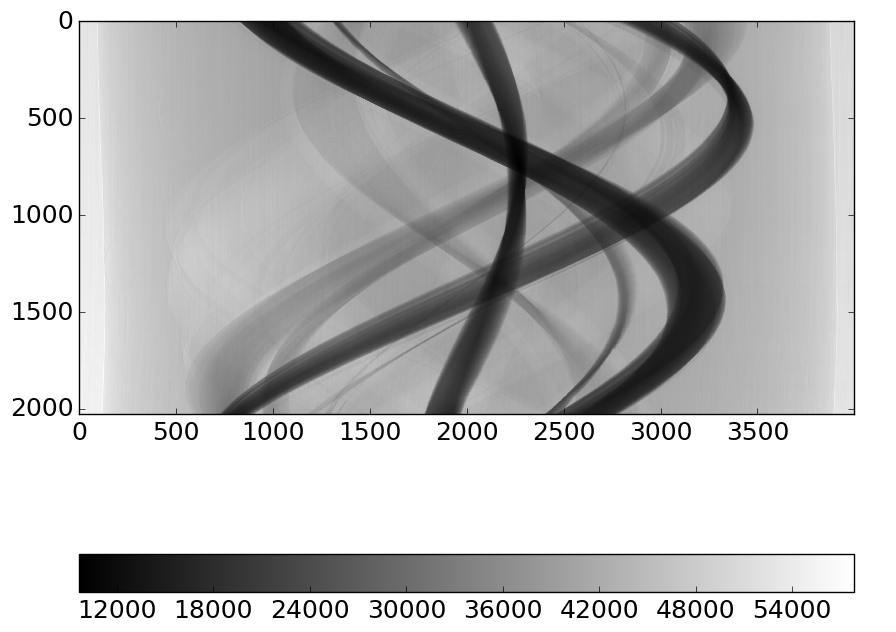

In [34]:
plt.figure(figsize=(10,12))
plt.imshow(sr, cmap=plt.cm.gray)
plt.colorbar(orientation='horizontal')

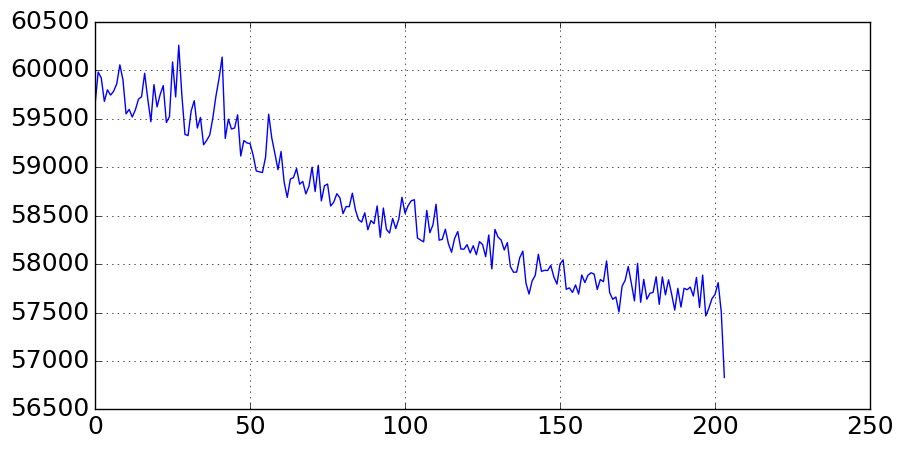

In [144]:
plt.figure(figsize=(10,5))
plt.plot(mx, label = 'max')
# plt.plot(mn, label = 'min')
# plt.plot(me, label = 'mean')
plt.grid()
# plt.legend(loc=0)

In [103]:
srf = sr_images[0]

In [105]:
slf = sl_images[0]

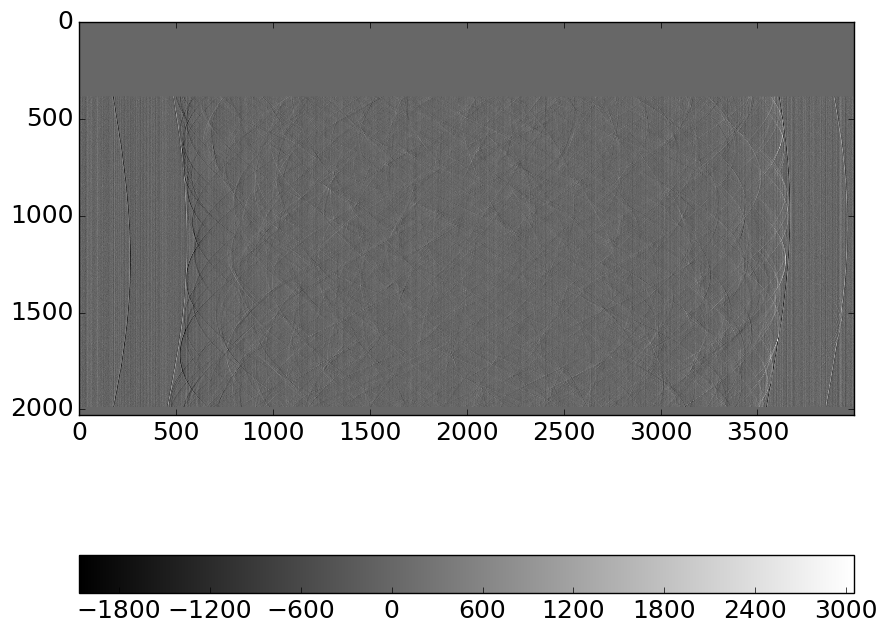

In [104]:
plt.figure(figsize=(10,12))
plt.imshow(sr-srf, cmap=plt.cm.gray)
plt.colorbar(orientation='horizontal')

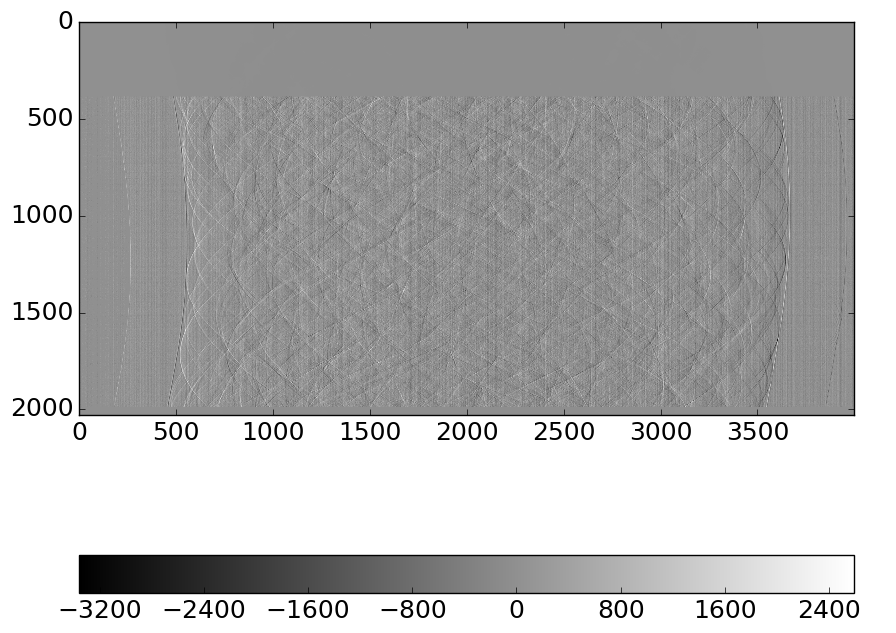

In [106]:
plt.figure(figsize=(10,12))
plt.imshow(sl-slf, cmap=plt.cm.gray)
plt.colorbar(orientation='horizontal')

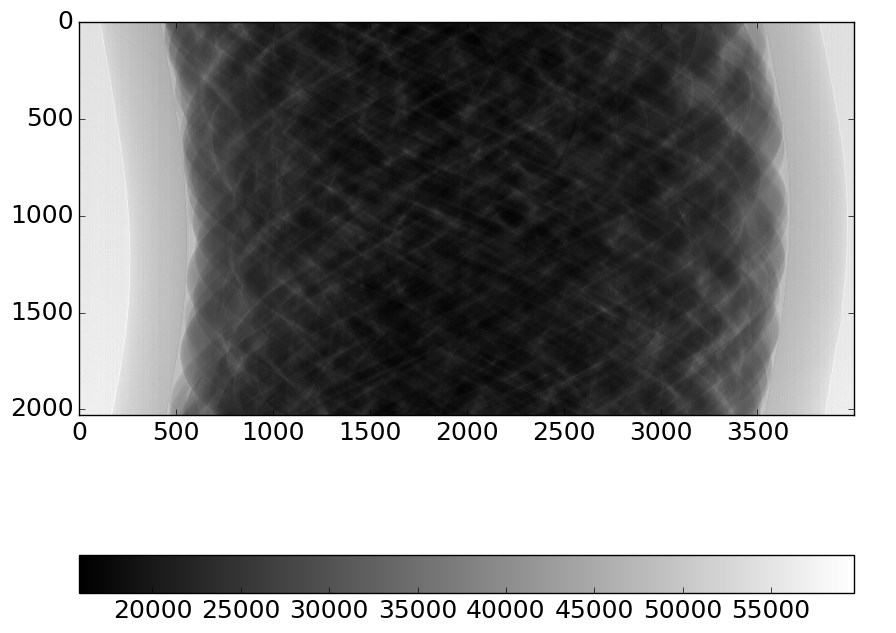

In [59]:
plt.figure(figsize=(10,12))
plt.imshow(sr, cmap=plt.cm.gray)
plt.colorbar(orientation='horizontal')

In [60]:
print(sr.min(), sr.max() )

(15856.0, 59703.0)


In [69]:
print(np.log(sr.min()), np.log(sr.max()))

(9.6713028, 10.997137)


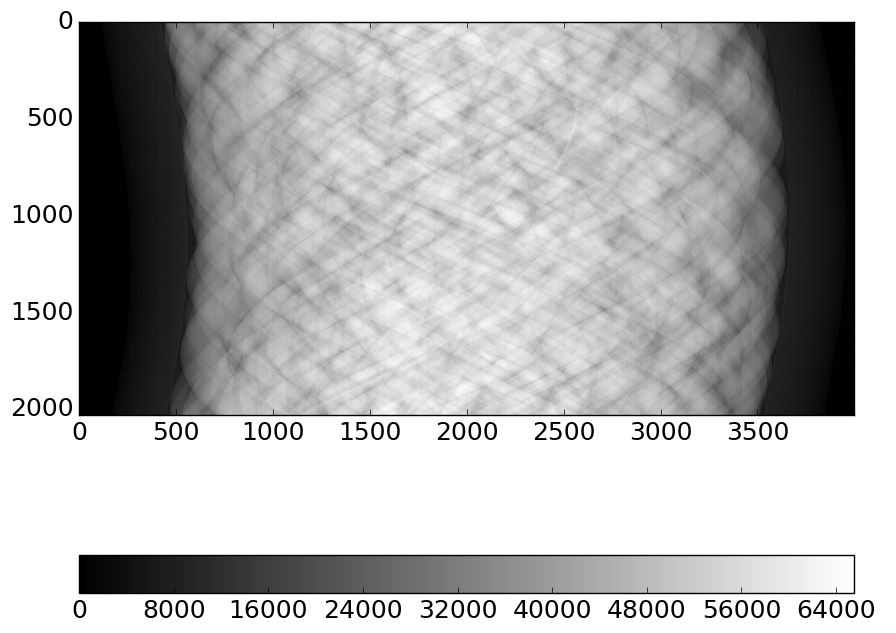

In [61]:
plt.figure(figsize=(10,12))
plt.imshow(sl, cmap=plt.cm.gray)
plt.colorbar(orientation='horizontal')

In [62]:
print(sl.min(), sl.max() )

(0.0, 65535.0)


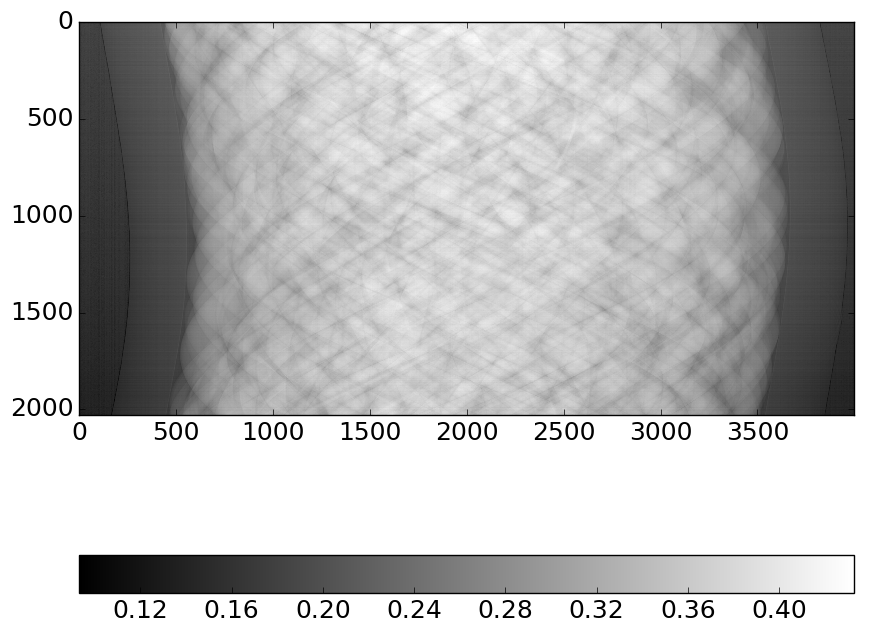

In [63]:
plt.figure(figsize=(10,12))
plt.imshow(-np.log(sr/65535)-(sl/65535), cmap=plt.cm.gray)
plt.colorbar(orientation='horizontal')

In [70]:
def images_diff(im1, im2):
    assert(im1.shape==im2.shape)
    rec_diff = np.zeros(shape=(im1.shape[0],im1.shape[1],3), dtype='float32')
    im1_t = im1.copy()
    im1_t = (im1_t-im1_t.min())/(im1_t.max()-im1_t.min())
    
    im2_t = im2.copy()
    im2_t = (im2_t-im2_t.min())/(im2_t.max()-im2_t.min())
    
    # nrecon_rec_t[nrecon_rec_t<0] = 0
    diff_rec = im1_t-im2_t
    rec_diff[...,0] = diff_rec*(diff_rec>0)
    rec_diff[...,1] = -diff_rec*(diff_rec<0)
    rec_diff[...,2] = rec_diff[...,1]
    return rec_diff

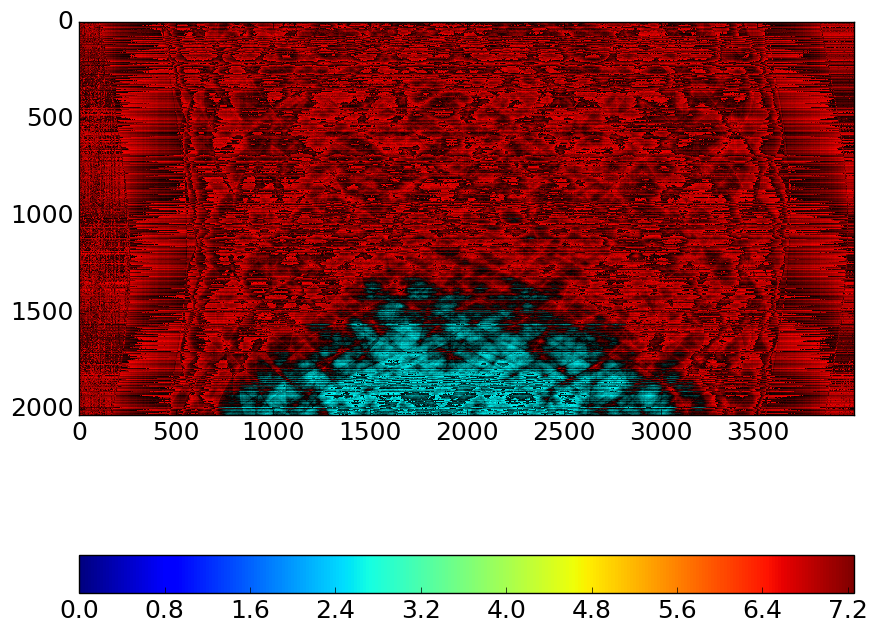

In [90]:
r=-np.log(sr/65535)
l=sl/65535
plt.figure(figsize=(10,12))
plt.imshow(100*images_diff(r,l))
plt.colorbar(orientation='horizontal')

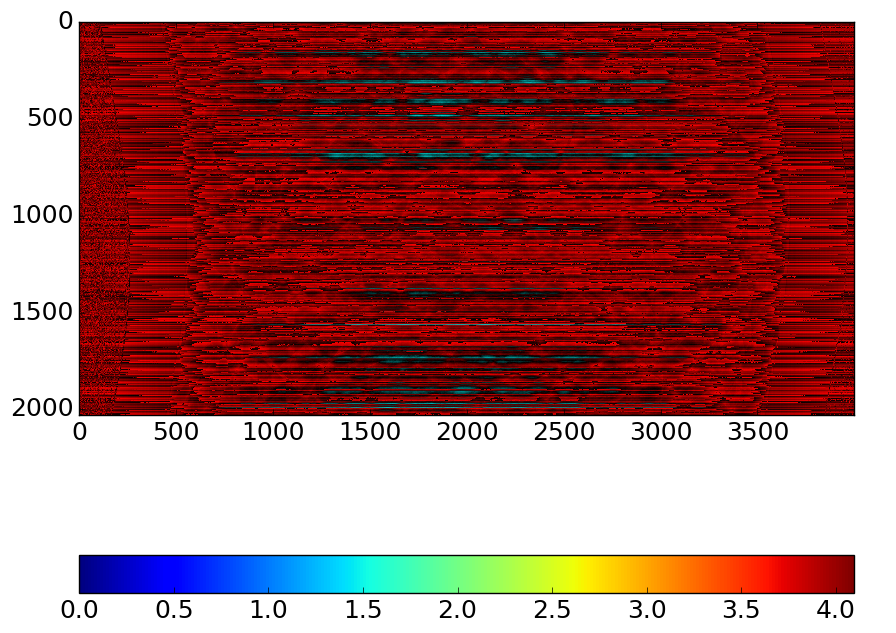

In [134]:
r=-np.log(sr/65535)
rr = (r.T-r.min(axis=-1)).T

l=sl/65535
plt.figure(figsize=(10,12))
plt.imshow(100*images_diff(rr,l))
plt.colorbar(orientation='horizontal')

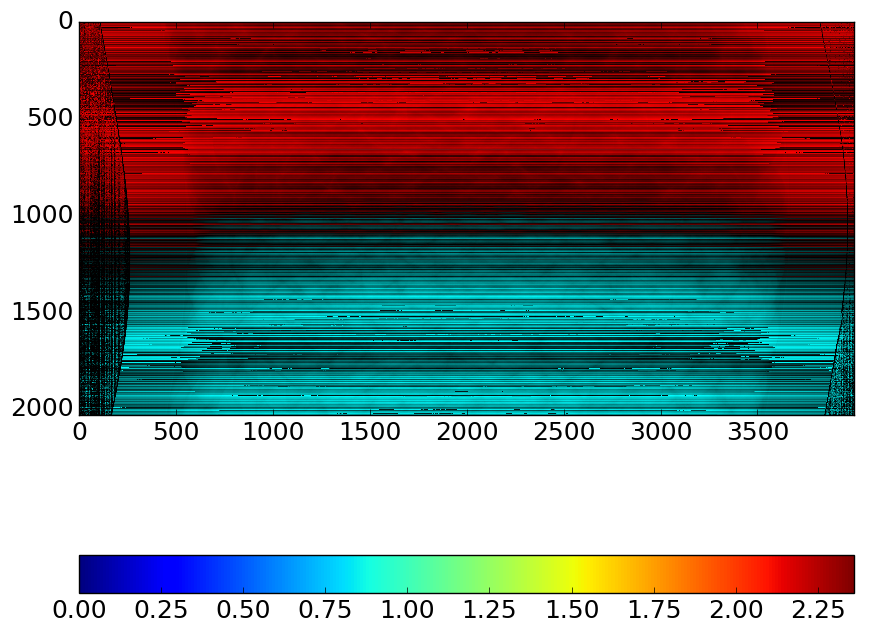

In [154]:
r=-np.log(sr/65535)
rr = (r-r.min(axis=-1).max())
rr[rr<0]=0

l=sl/65535
plt.figure(figsize=(10,12))
plt.imshow(100*images_diff(rr,l))
plt.colorbar(orientation='horizontal')

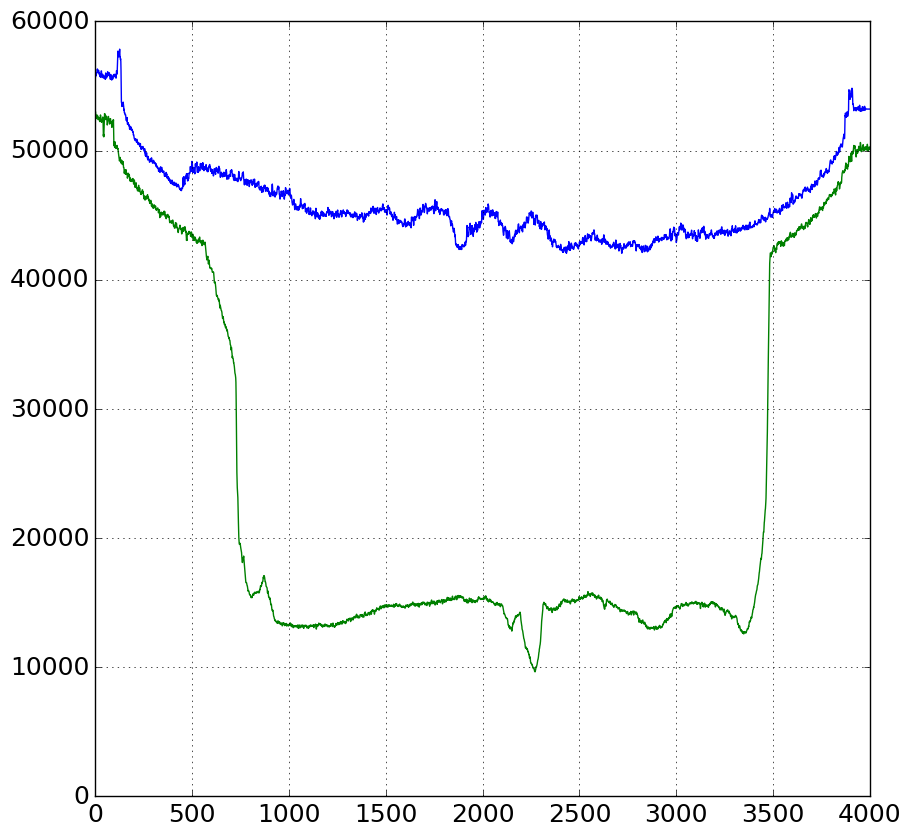

In [35]:
plt.figure(figsize=(10,10))
plt.plot(sr.max(axis=0))
plt.plot(sr.min(axis=0))
plt.grid(True)

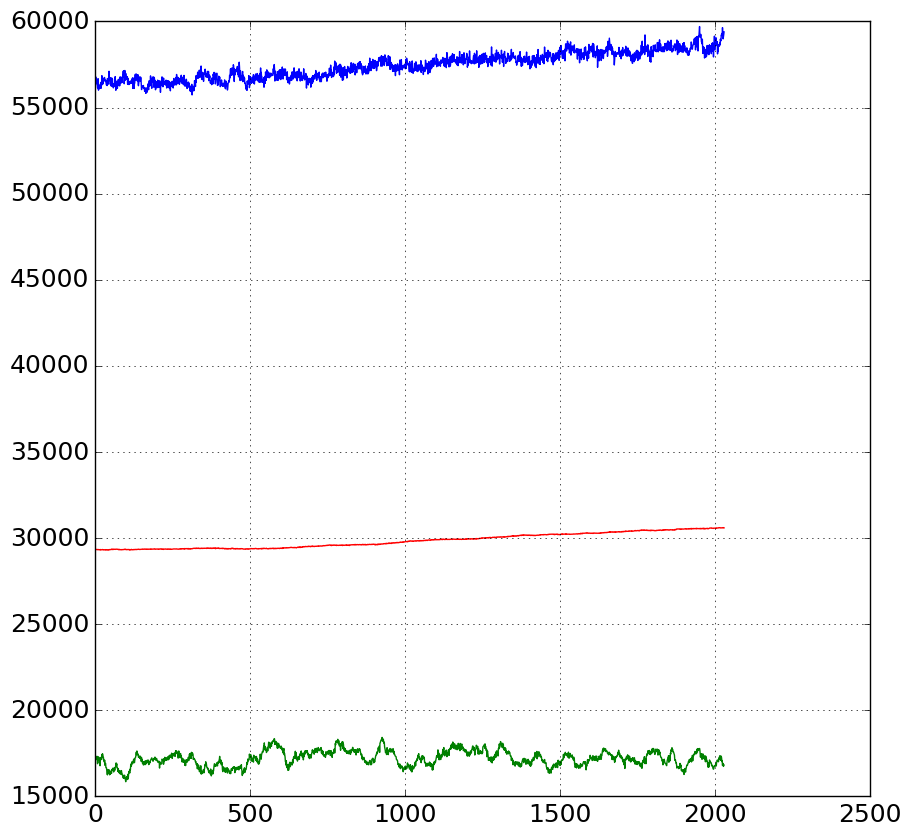

In [182]:
plt.figure(figsize=(10,10))
plt.plot(sr.max(axis=-1))
plt.plot(sr.min(axis=-1))
plt.plot(sr.mean(axis=-1))
plt.grid(True)

In [220]:
2**16*0.9

58982.4

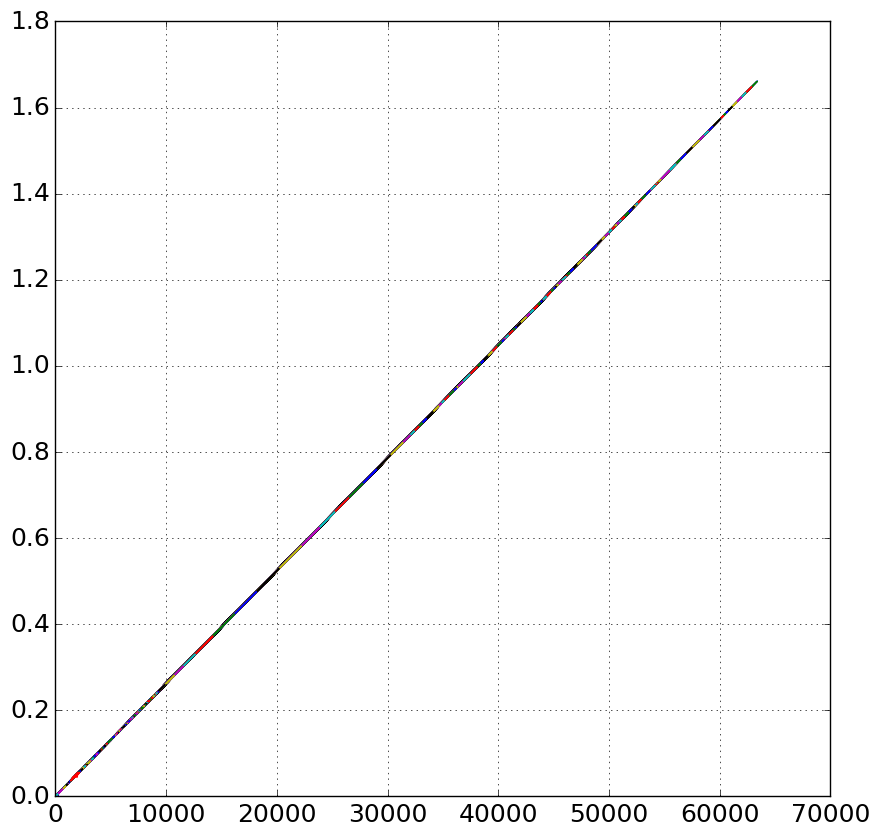

In [49]:
x = sl[100::100]
y=sr.copy()[100::100]
trh = y[:,:10].mean(axis=-1)
for i in range(y.shape[0]):
    t=y[i]
    t[t>trh[i]]=trh[i]
    t/=trh[i]
y = -np.log(y)
# y = (y.T-y.min(axis=-1)).T
plt.figure(figsize=(10,10))
plt.plot(x, y)
# plt.plot(x,y)
plt.grid(True)

In [82]:
x = sl.copy()
y=sr.copy()
trh = y[:,:11].mean(axis=-1)
for i in range(y.shape[0]):
    t=y[i]
    t[t>trh[i]]=trh[i]
    t/=trh[i]
y = -np.log(y)

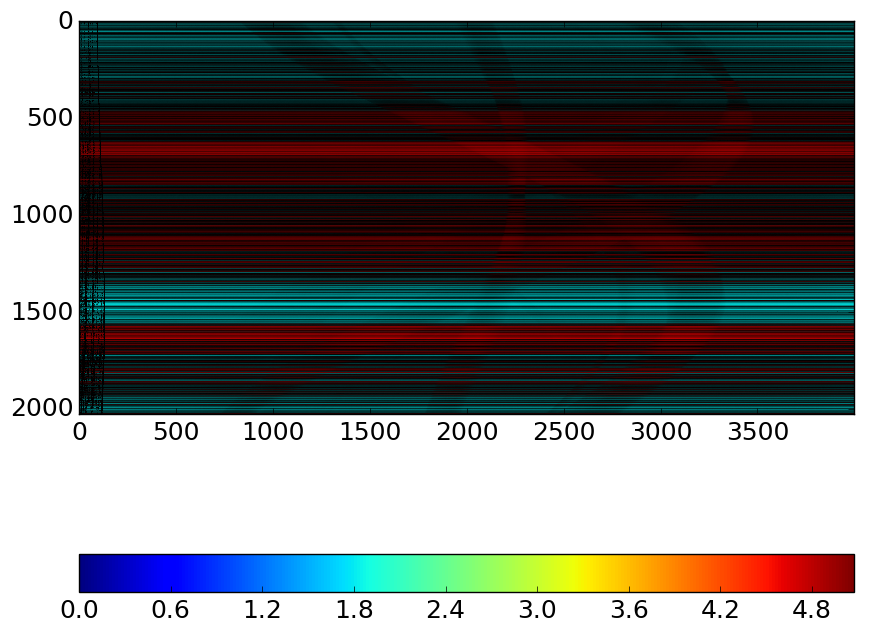

In [80]:
plt.figure(figsize=(10,12))
plt.imshow(1000*images_diff(x,y))
plt.colorbar(orientation='horizontal')

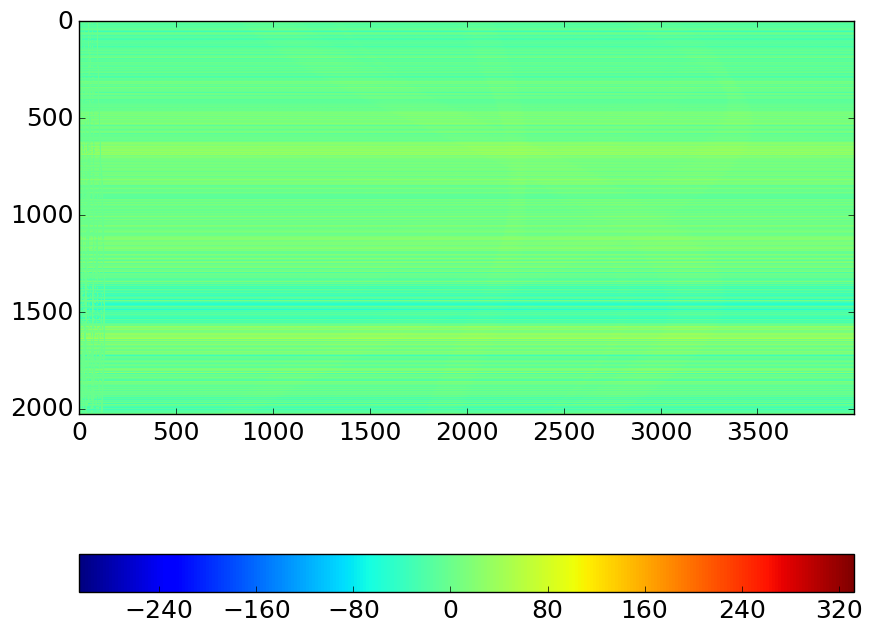

In [81]:
plt.figure(figsize=(10,12))
plt.imshow(x-y/y.max()*65535)
plt.colorbar(orientation='horizontal')

In [84]:
np.max(x-y/y.max()*65535)

330.18311

In [47]:
trh[np.newaxis,:].shape

(1, 2029)

In [209]:
from scipy.optimize import curve_fit

In [210]:
p = curve_fit(lambda x,a,b: a*x+b, x.ravel(), y.ravel())
print p

(array([  1.91234336e-05,   3.26636959e-02]), array([[  7.87617246e-19,  -2.89574992e-14],
       [ -2.89574992e-14,   1.37968999e-09]]))


In [211]:
-p[0][1]/p[0][0]

-1708.0455626175631

In [201]:
sr.max()

59703.0

In [204]:
sr.max(axis=-1).mean()

57436.359

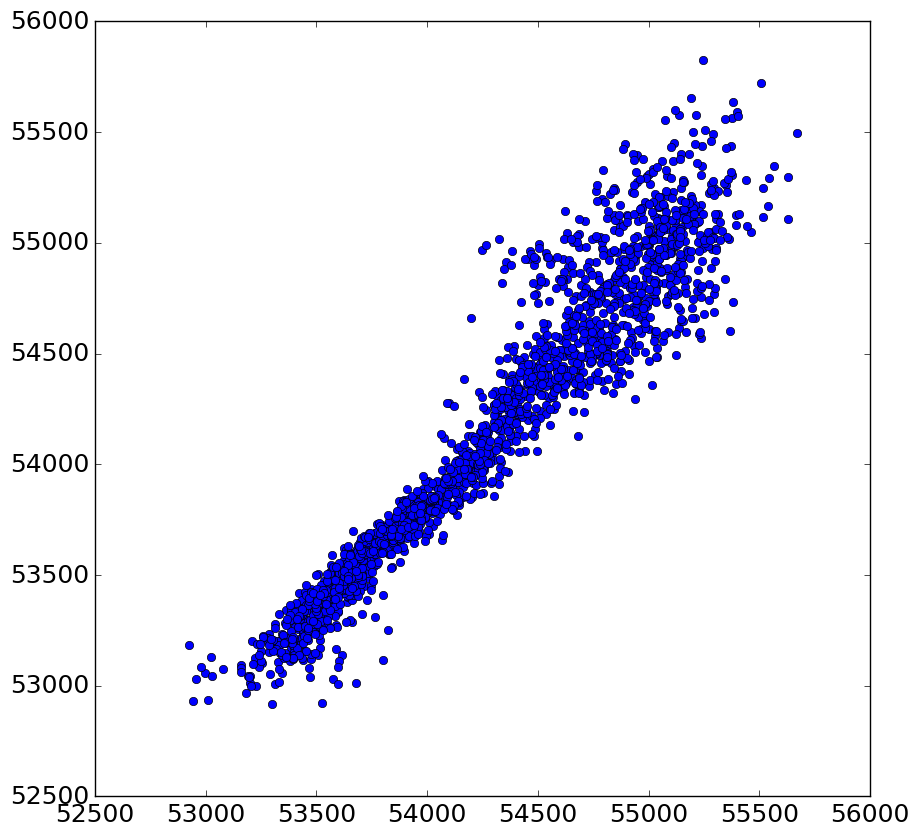

In [78]:
r=sr.copy()
r[sl>0]=65535
plt.figure(figsize=(10,10))
plt.plot(sr[:,:1].mean(axis=-1),r.min(axis=-1),'o')
    

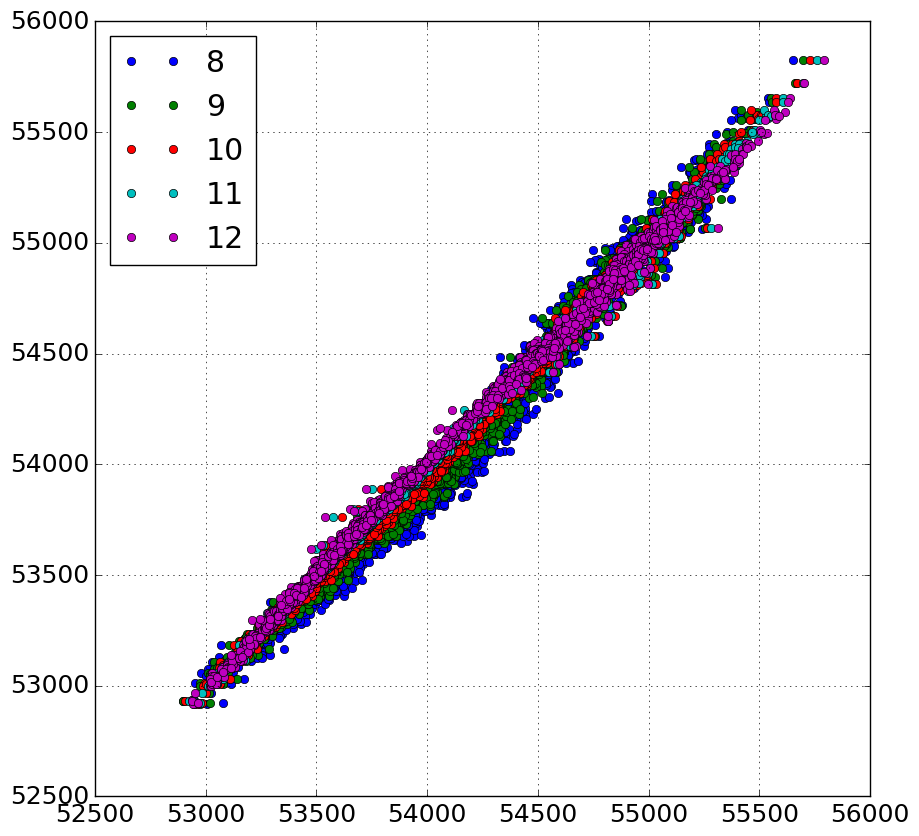

In [79]:
r=sr.copy()
r[sl>0]=65535
plt.figure(figsize=(10,10))
for ss in range(8,13):
    # plt.plot(r.min(axis=-1))
    # plt.plot(sr.max(axis=-1))
    plt.plot(sr[:,:ss].mean(axis=-1),r.min(axis=-1), 'o', label=ss)
    
plt.grid()
plt.legend(loc=0)
    # plt.plot(x,y)
    # plt.colorbar()

/home/makov/opt/anaconda/envs/astra-dbg/lib/python2.7/site-packages/ipykernel/__main__.py:8: RuntimeWarning: divide by zero encountered in divide
/home/makov/opt/anaconda/envs/astra-dbg/lib/python2.7/site-packages/ipykernel/__main__.py:8: RuntimeWarning: invalid value encountered in divide


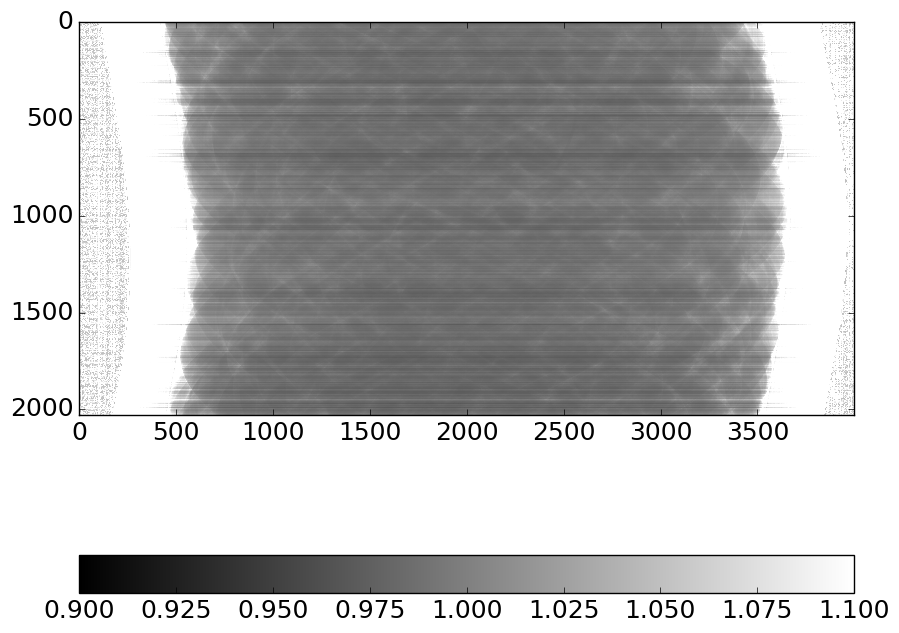

In [185]:
r=-np.log(sr)
rr = ((r.T-r.min(axis=-1))/r.mean(axis=-1)).T*r.mean()
rr[rr<0]=0

l=sl/60000
plt.figure(figsize=(10,12))
# plt.imshow(100*images_diff(rr,l))
plt.imshow(rr/(1.2*l),cmap=plt.cm.gray,vmin=0.9, vmax=1.1)
plt.colorbar(orientation='horizontal')

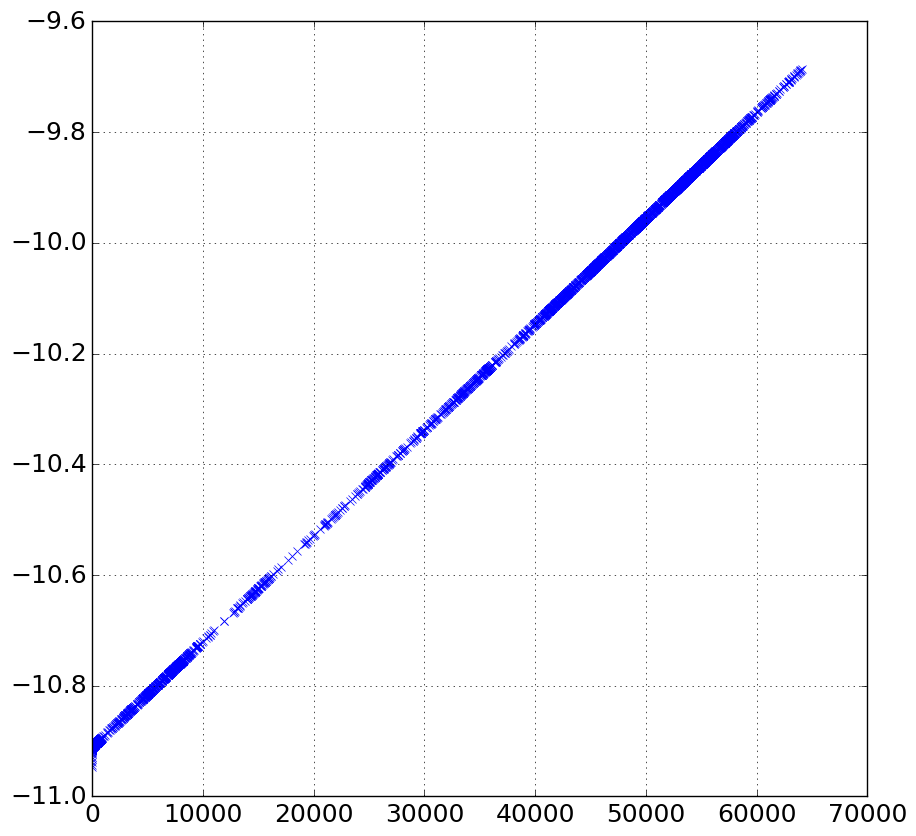

In [93]:
x = sl
y = -np.log(sr)
plt.figure(figsize=(10,10))
plt.plot(x[100], y[100],'x')
plt.grid(True)

In [101]:
np.log(55000)

10.915088464214607

In [102]:
np.exp(0.05)

1.0512710963760241

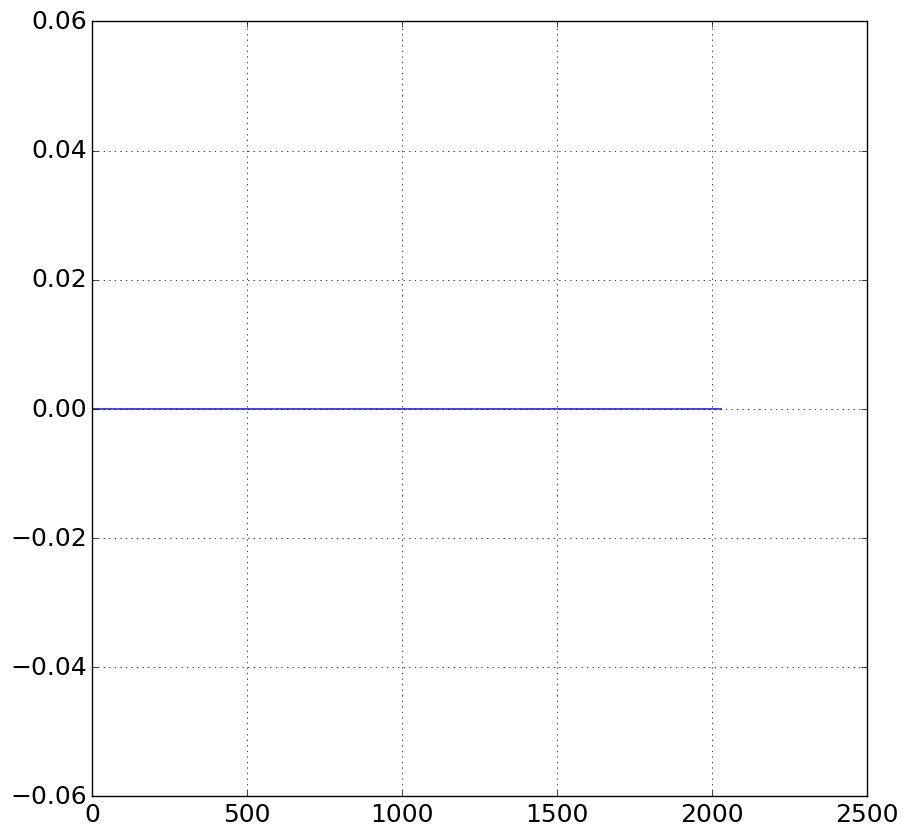

In [92]:
plt.figure(figsize=(10,10))
plt.plot(sl.min(axis=-1))
plt.grid(True)

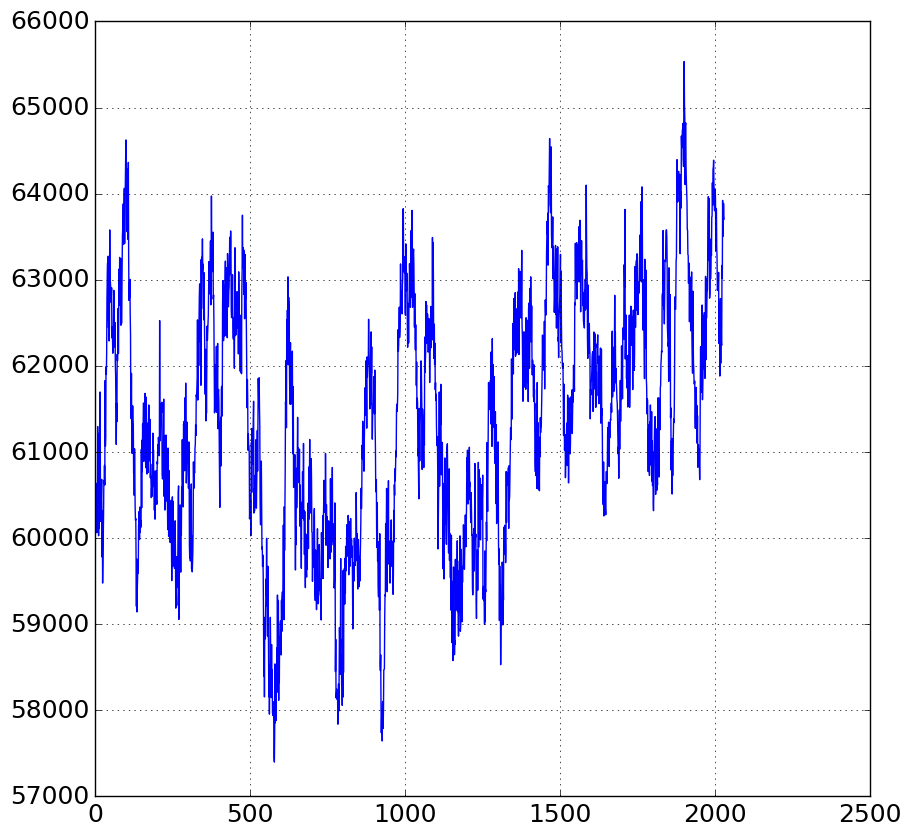

In [94]:
plt.figure(figsize=(10,10))
plt.plot(sl.max(axis=-1))
plt.grid(True)

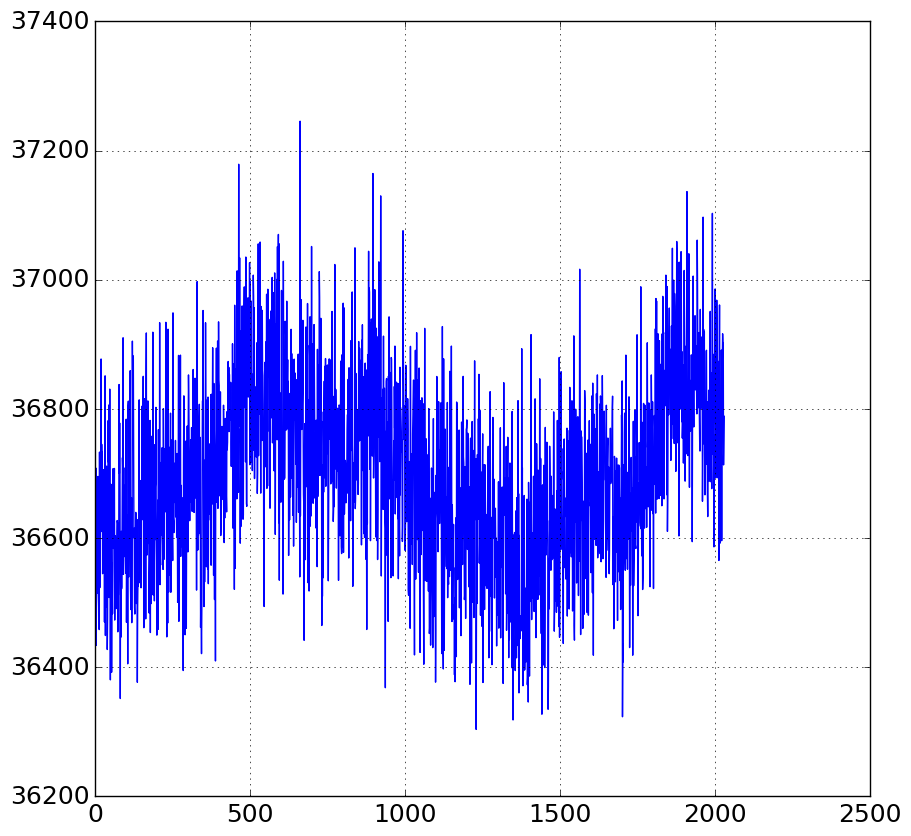

In [95]:
plt.figure(figsize=(10,10))
plt.plot(sl.mean(axis=-1))
plt.grid(True)

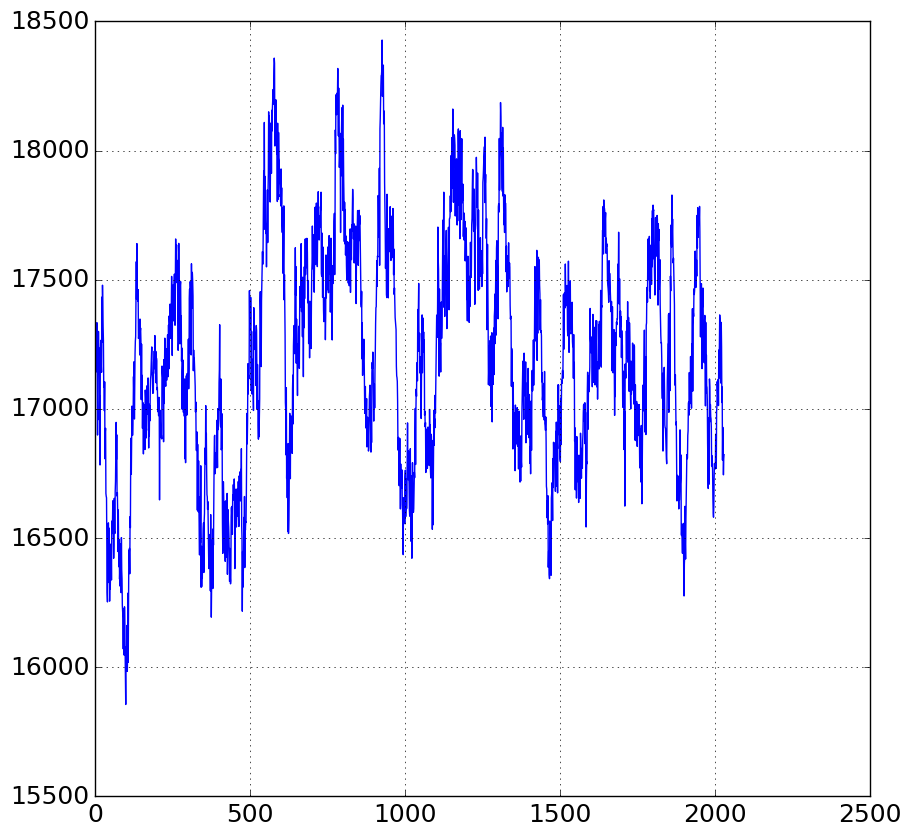

In [107]:
plt.figure(figsize=(10,10))
plt.plot(sr.min(axis=-1))
plt.grid(True)

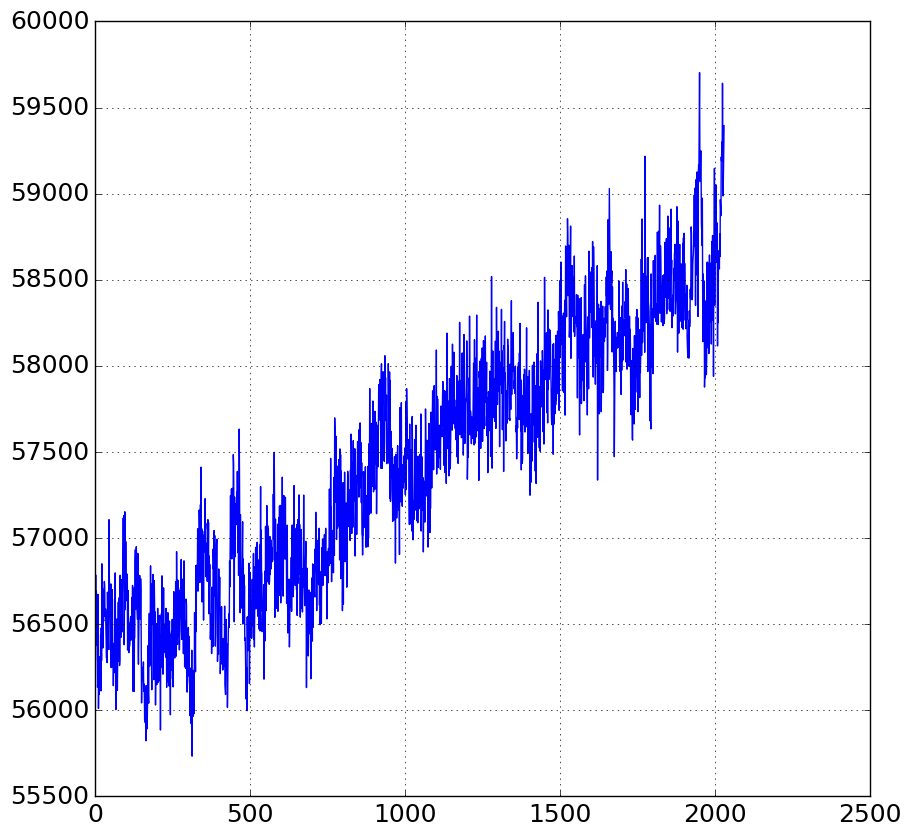

In [108]:
plt.figure(figsize=(10,10))
plt.plot(sr.max(axis=-1))
plt.grid(True)

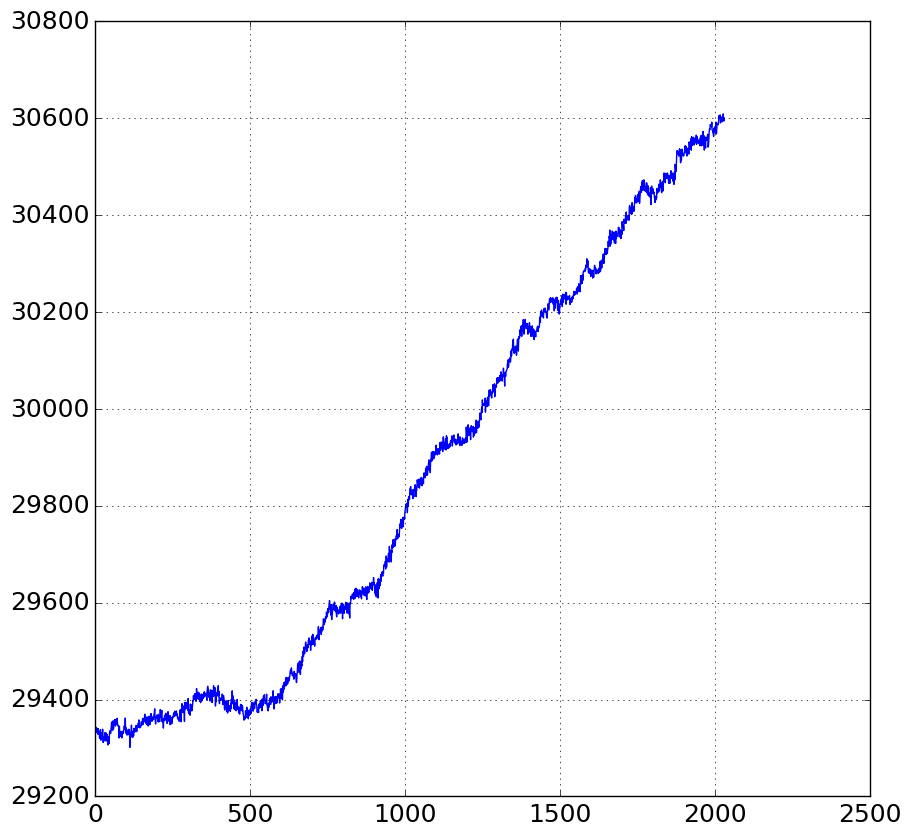

In [110]:
plt.figure(figsize=(10,10))
plt.plot(sr.mean(axis=-1))
plt.grid(True)

In [57]:
np.exp(10.9)

54176.363796698752

In [100]:
np.min(sl)

0.0

In [163]:
from skimage.filter import gaussian

In [113]:
print(sorted(bh_images.keys()))

[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95]


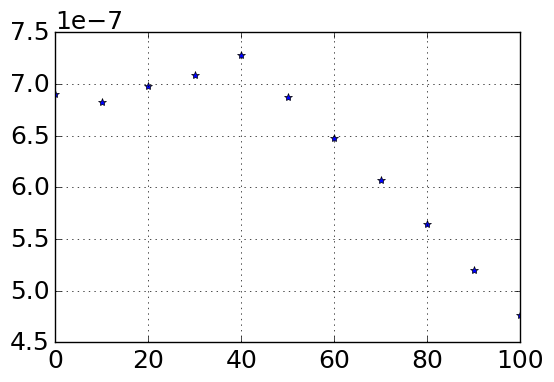

In [171]:
s = []
v_prev = None
for k in log_progress(sorted(bh_images.keys())):
    v = bh_images[k]
    v = v*(v_max-v_min)/(v.max()-v.min())+v_min
    v = medianBlur(v,3) 
#     if v_prev is None:
#         v_prev = v
#         continue
    r = np.mean(v-gaussian(v,10))/np.mean(v)
    v_prev = v
    s.append((k,r))
s = np.array(s)

plt.plot(s[:,0],s[:,1],'*')
plt.grid(True)

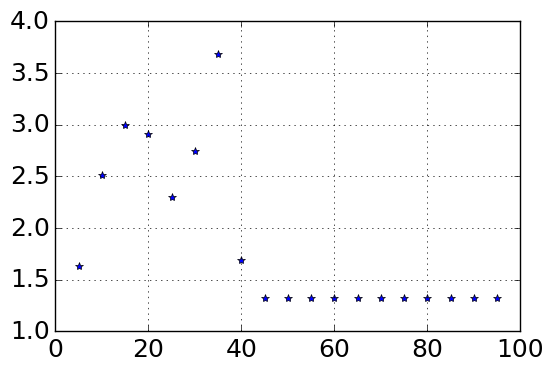

In [139]:
s = []
v_prev = None
for k in log_progress(sorted(bh_images.keys())):
    v = bh_images[k]
    v = v*(v_max-v_min)/(v.max()-v.min())+v_min
#     v = medianBlur(v,3) 
    if v_prev is None:
        v_prev = v
        continue  
    t = np.linalg.norm(v-v_prev)
    v_prev = v
    s.append((k,t))
s = np.array(s)

plt.plot(s[:,0],s[:,1],'*')
plt.grid(True)

In [ ]:
# %load /diskmnt/a/makov/yaivan/Sand/Raw/Chieftain_Unc_2.8_.log
[System]
Scanner=Skyscan1172
Instrument S/N=08G01121
Hardware version=A
Software=Version 1. 5 (build 23)
Home directory=C:\SkyScan
Source Type=Hamamatsu 100/250
Camera=Hamamatsu 10Mp camera
Camera Pixel Size (um)=   11.40
CameraXYRatio=1.0010
Incl.in lifting (um/mm)=-0.4750
[User]
User Name=IYakimchuk
Computer Name=SLB-6BBX74J
[Acquisition]
Data directory=E:\Results\Yakimchuk\2016_Digital Fracture Conductivity\00_Pre-Study\01. Sands\01. Chieftain Sand 20-40 Unconfined\Raw
Filename Prefix=Chieftain_Unc_2.8_
Configuration=C:\Skyscan1172A_10MP_Hamamatsu\std
Number of Files= 2031
Source Voltage (kV)= 100
Source Current (uA)= 100
Number of Rows= 2096
Number of Columns= 4000
Image crop origin X=   0
Image crop origin Y=0
Camera binning=1x1
Image Rotation=0.5200
Gantry direction=CC
Image Pixel Size (um)=    2.83
Object to Source (mm)=56.000
Camera to Source (mm)=225.315
Vertical Object Position (mm)=37.797
Optical Axis (line)= 980
Filter=Al 0.5 mm
Image Format=TIFF
Depth (bits)=16
Screen LUT=0
Exposure (ms)=  1767
Rotation Step (deg)=0.100
Frame Averaging=ON (9)
Random Movement=OFF (10)
Use 360 Rotation=NO
Geometrical Correction=ON
Camera Offset=OFF
Median Filtering=ON
Flat Field Correction=ON
Rotation Direction=CC
Scanning Trajectory=ROUND
Type Of Motion=STEP AND SHOOT
Study Date and Time=Jan 23, 2016  05:45:50
Scan duration=10:06:00
[Reconstruction]
Reconstruction Program=NRecon
Program Version=Version: 1.6.5.8
Program Home Directory=C:\SkyScan\NRecon_GPU
Reconstruction engine=NReconServer
Engine version=Version: 1.6.5
Reconstruction from batch=No
Reconstruction servers= slb-8hlv74j 
Option for additional F4F float format=OFF
Dataset Origin=Skyscan1172
Dataset Prefix=Chieftain_Unc_2.8_
Dataset Directory=E:\Results\Yakimchuk\2016_Digital Fracture Conductivity\00_Pre-Study\01. Sands\01. Chieftain Sand 20-40 Unconfined\Raw
Output Directory=E:\Results\Yakimchuk\2016_Digital Fracture Conductivity\00_Pre-Study\01. Sands\01. Chieftain Sand 20-40 Unconfined\Reconstructed
Time and Date=Jan 26, 2016  16:58:16
First Section=98
Last Section=1982
Reconstruction duration per slice (seconds)=5.300265
Total reconstruction time (1885 slices) in seconds=9991.000000
Postalignment=-6.00
Section to Section Step=1
Sections Count=1885
Result File Type=PNG
Result File Header Length (bytes)=Unknown: compressed JPG format (100%)
Result Image Width (pixels)=4000
Result Image Height (pixels)=4000
Pixel Size (um)=2.83356
Reconstruction Angular Range (deg)=203.00
Use 180+=OFF
Angular Step (deg)=0.1000
Smoothing=0
Ring Artifact Correction=20
Draw Scales=OFF
Object Bigger than FOV=OFF
Reconstruction from ROI=OFF
Filter cutoff relative to Nyquisit frequency=100
Filter type=0
Filter type meaning(1)=0: Hamming (Ramp in case of optical scanner); 1: Hann; 2: Ramp; 3: Almost Ramp; 
Filter type meaning(2)=11: Cosine; 12: Shepp-Logan; [100,200]: Generalized Hamming, alpha=(iFilter-100)/100
Undersampling factor=1
Threshold for defect pixel mask (%)=0
Beam Hardening Correction (%)=60
CS Static Rotation (deg)=0.0
Minimum for CS to Image Conversion=-0.0250
Maximum for CS to Image Conversion=0.0680
HU Calibration=OFF
BMP LUT=0
Cone-beam Angle Horiz.(deg)=11.557156
Cone-beam Angle Vert.(deg)=6.070880


In [ ]:
# %load /diskmnt/a/makov/yaivan/Sand/_tmp/nrecon/bh_0_rc_0/tomo_config.log
[System]
Scanner = Skyscan1172
Instrument S/N = 08G01121
Hardware version = A
Software = Version 1. 5 (build 23)
Home directory = C:\SkyScan
Source Type = Hamamatsu 100/250
Camera = Hamamatsu 10Mp camera
Camera Pixel Size (um) = 11.40
CameraXYRatio = 1.0010
Incl.in lifting (um/mm) = -0.4750

[User]
User Name = IYakimchuk
Computer Name = SLB-6BBX74J

[Acquisition]
Data directory = E:\Results\Yakimchuk\2016_Digital Fracture Conductivity\00_Pre-Study\01. Sands\01. Chieftain Sand 20-40 Unconfined\Raw
Filename Prefix = Chieftain_Unc_2.8_
Configuration = C:\Skyscan1172A_10MP_Hamamatsu\std
Number of Files = 2031
Source Voltage (kV) = 100
Source Current (uA) = 100
Number of Rows = 2096
Number of Columns = 4000
Image crop origin X = 0
Image crop origin Y = 0
Camera binning = 1x1
Image Rotation = 0.5200
Gantry direction = CC
Image Pixel Size (um) = 2.83
Object to Source (mm) = 56.000
Camera to Source (mm) = 225.315
Vertical Object Position (mm) = 37.797
Optical Axis (line) = 980
Filter = Al 0.5 mm
Image Format = TIFF
Depth (bits) = 16
Screen LUT = 0
Exposure (ms) = 1767
Rotation Step (deg) = 0.100
Frame Averaging = ON (9)
Random Movement = OFF (10)
Use 360 Rotation = NO
Geometrical Correction = ON
Camera Offset = OFF
Median Filtering = ON
Flat Field Correction = ON
Rotation Direction = CC
Scanning Trajectory = ROUND
Type Of Motion = STEP AND SHOOT
Study Date and Time = Jan 23, 2016  05:45:50
Scan duration = 10:06:00

[Reconstruction]
Reconstruction Program = NRecon
Program Version = Version: 1.6.5.8
Program Home Directory = C:\SkyScan\NRecon_GPU
Reconstruction engine = NReconServer
Engine version = Version: 1.6.5
Reconstruction from batch = No
Reconstruction servers = slb-8hlv74j
Option for additional F4F float format = OFF
Dataset Origin = Skyscan1172
Dataset Prefix = Chieftain_Unc_2.8_
Dataset Directory = f:\big\yaivan\Sand\Raw
Output Directory = C:\Users\makov\Desktop\NRecon_out\Chieftain_Unc_2.8_\bh_0_rc_0
Time and Date = Jan 26, 2016  16:58:16
First Section = 980
Last Section = 980
Reconstruction duration per slice (seconds) = 5.300265
Total reconstruction time (1885 slices) in seconds = 9991.000000
Postalignment = -6.00
Section to Section Step = 1
Sections Count = 1885
Result File Type = PNG
Result File Header Length (bytes) = Unknown: compressed JPG format (100%)
Result Image Width (pixels) = 4000
Result Image Height (pixels) = 4000
Pixel Size (um) = 2.83356
Reconstruction Angular Range (deg) = 203.00
Use 180+ = OFF
Angular Step (deg) = 0.1000
Smoothing = 0
Ring Artifact Correction = 0
Draw Scales = OFF
Object Bigger than FOV = OFF
Reconstruction from ROI = OFF
Filter cutoff relative to Nyquisit frequency = 100
Filter type = 0
Filter type meaning(1) = 0: Hamming (Ramp in case of optical scanner); 1: Hann; 2: Ramp; 3: Almost Ramp;
Filter type meaning(2) = 11: Cosine; 12: Shepp-Logan; [100,200]: Generalized Hamming, alpha=(iFilter-100)/100
Undersampling factor = 1
Threshold for defect pixel mask (%) = 0
Beam Hardening Correction (%) = 0
CS Static Rotation (deg) = 0.0
Minimum for CS to Image Conversion = -0.0250
Maximum for CS to Image Conversion = 0.0680
HU Calibration = OFF
BMP LUT = 0
Cone-beam Angle Horiz.(deg) = 11.557156
Cone-beam Angle Vert.(deg) = 6.070880



In [109]:
tmp_bh =bh_images[70]

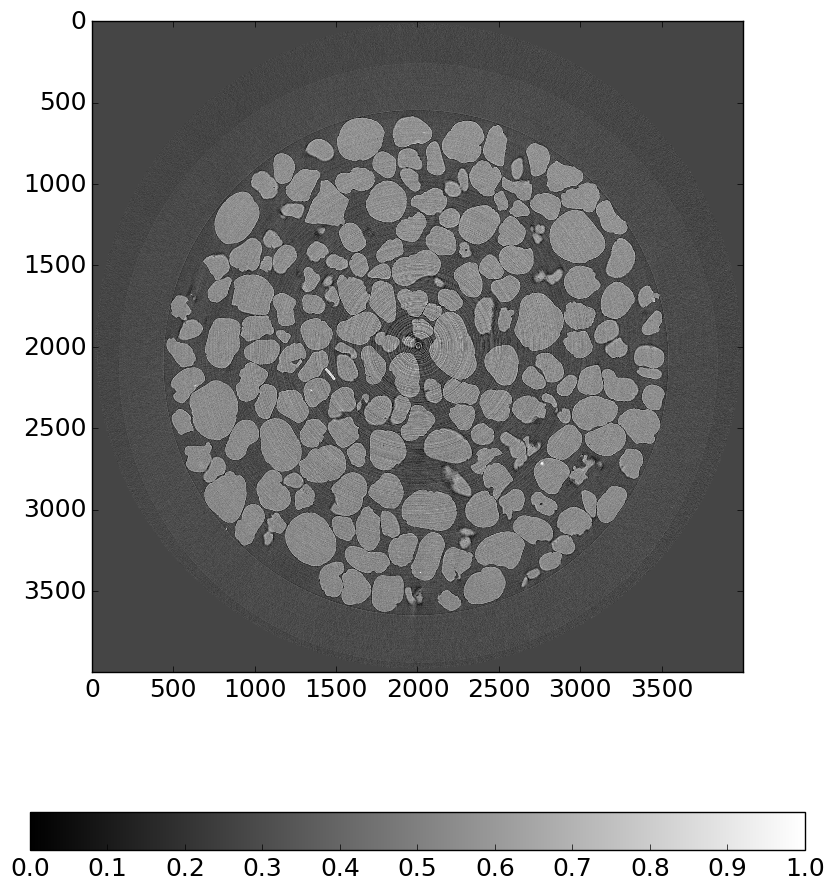

In [108]:
plt.figure(figsize=(10,12))
plt.imshow(tmp_bh, cmap=plt.cm.gray)
plt.colorbar(orientation='horizontal')

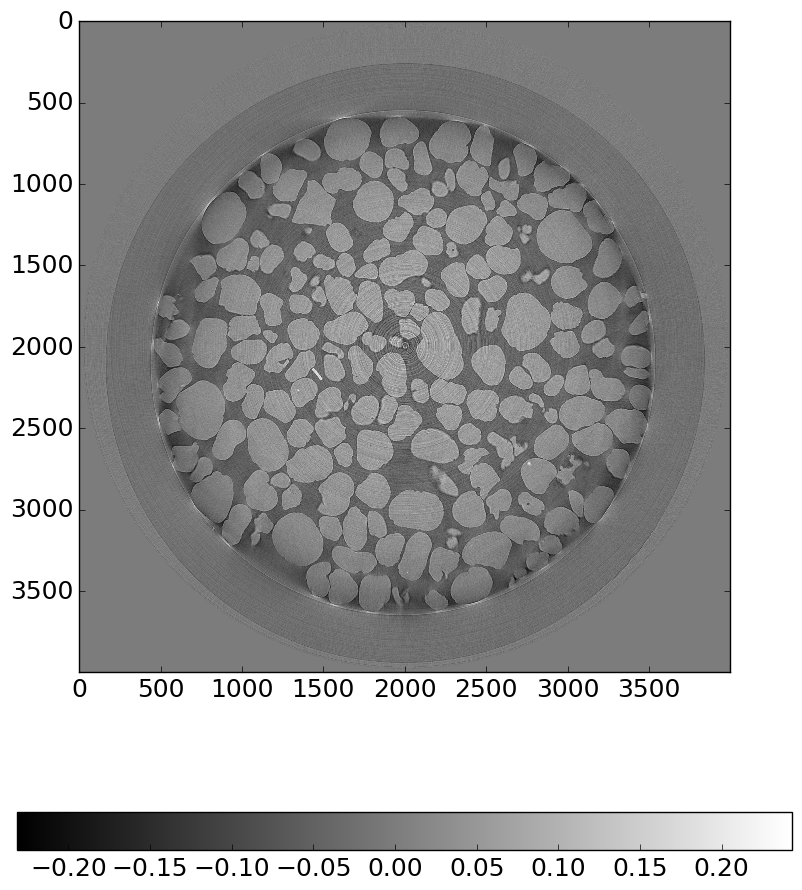

In [121]:
plt.figure(figsize=(10,12))
plt.imshow(bh_images[60]-bh_images[0], cmap=plt.cm.gray)
plt.colorbar(orientation='horizontal')

In [127]:
roi = tmp_bh > (np.percentile(tmp_bh.flatten(),95))

In [128]:
roi = tmp_bh > (np.mean(tmp_bh)*1.5)

In [129]:
from skimage.morphology import erosion

In [130]:
roi = erosion(roi)

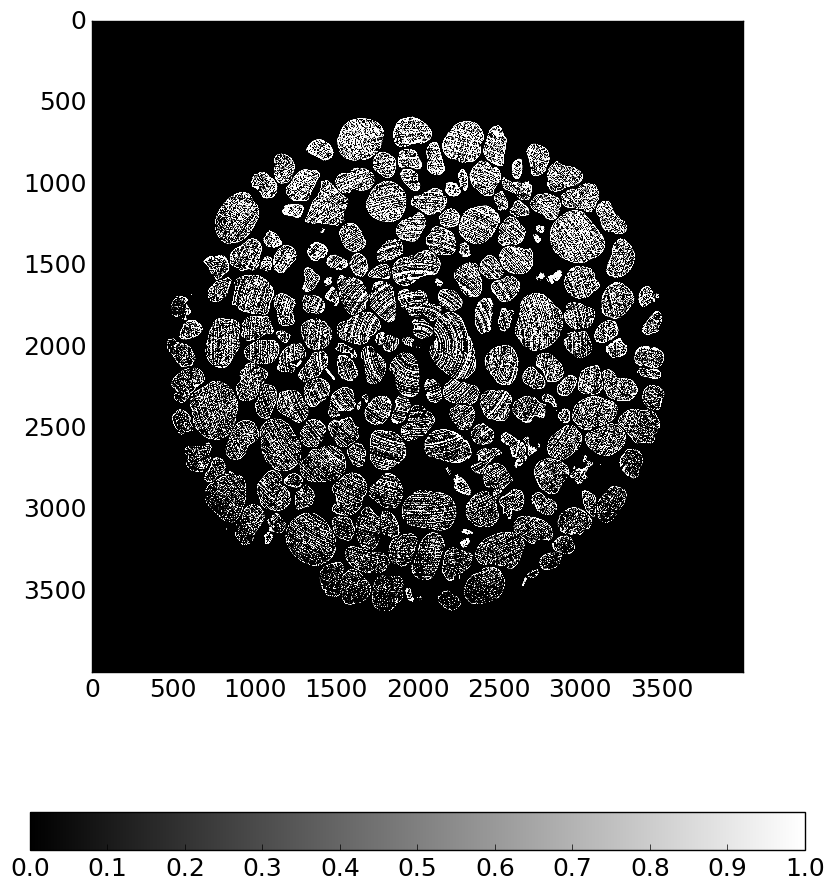

In [131]:
plt.figure(figsize=(10,12))
plt.imshow(roi, cmap=plt.cm.gray)
plt.colorbar(orientation='horizontal')

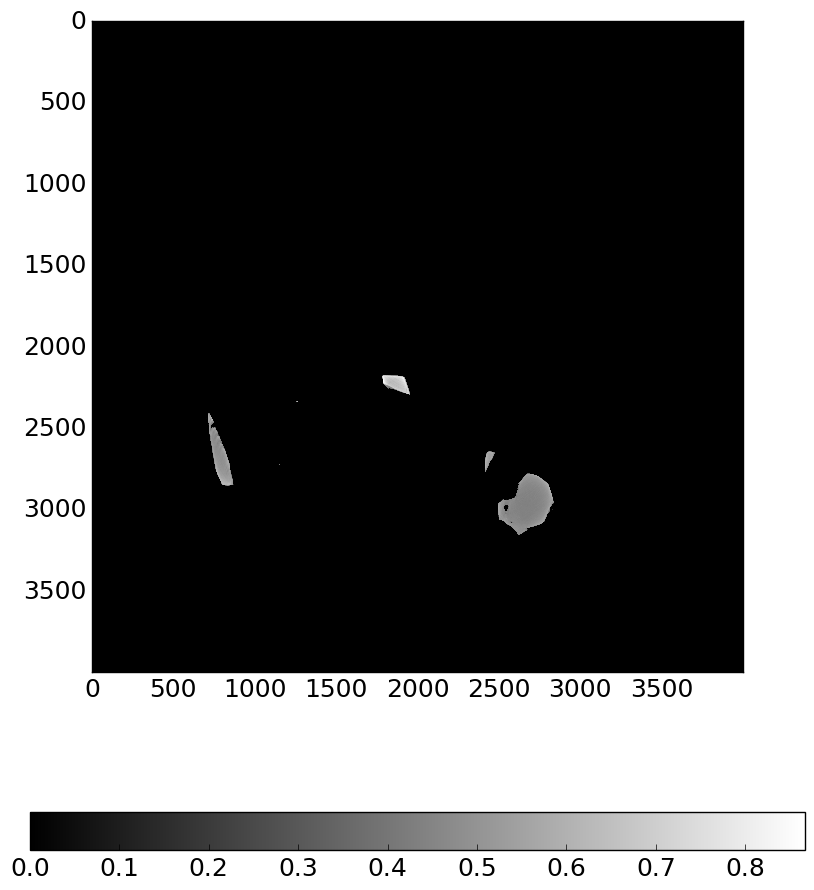

In [77]:
filt_im = roi*tmp_bh
plt.figure(figsize=(10,12))
plt.imshow(filt_im, cmap=plt.cm.gray)
plt.colorbar(orientation='horizontal')

In [31]:
grad = np.gradient(np.ntmp_bh)

In [36]:
grad_abs = np.sqrt(grad[0]**2+grad[1]**2)

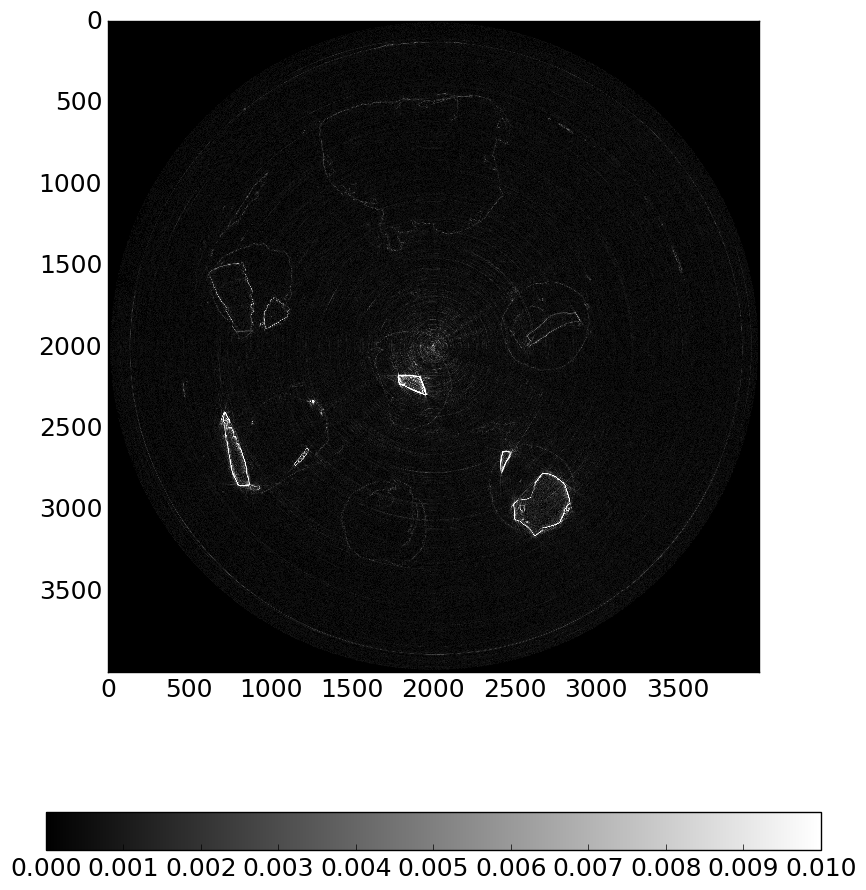

In [66]:
plt.figure(figsize=(10,12))
plt.imshow(grad_abs*tmp_bh, cmap=plt.cm.gray,vmax=0.)
plt.colorbar(orientation='horizontal')

In [46]:
grad_median = np.median(grad_abs.flatten())
print(grad_median)

0.00196078


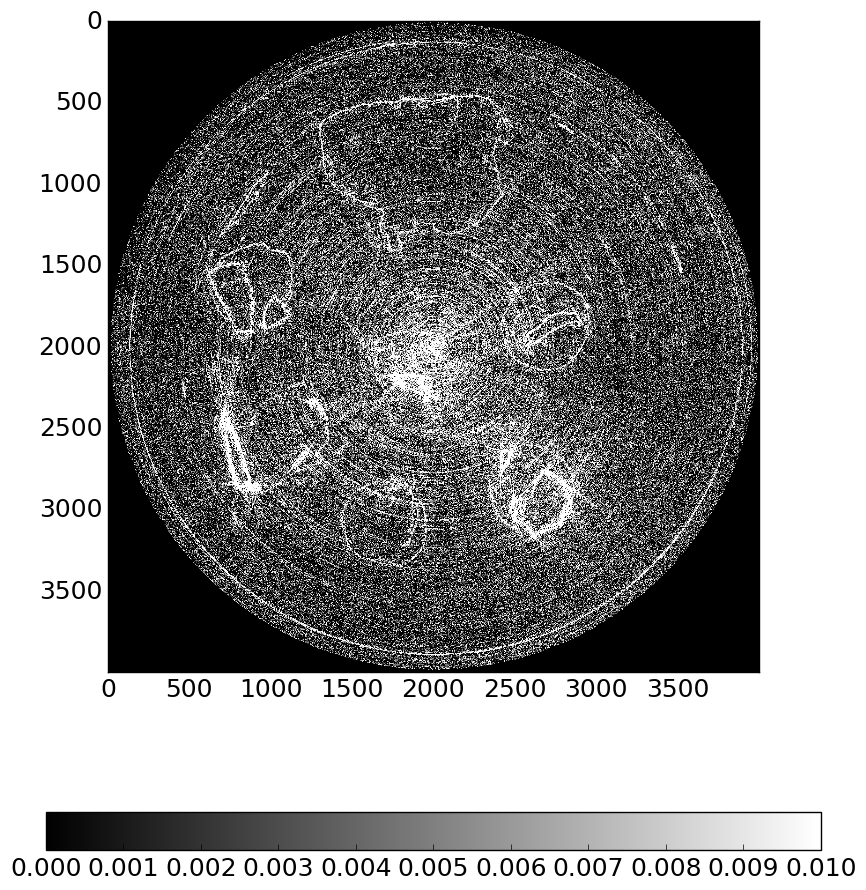

In [48]:
plt.figure(figsize=(10,12))
plt.imshow(grad_abs>grad_median, cmap=plt.cm.gray,vmax=0.01)
plt.colorbar(orientation='horizontal')

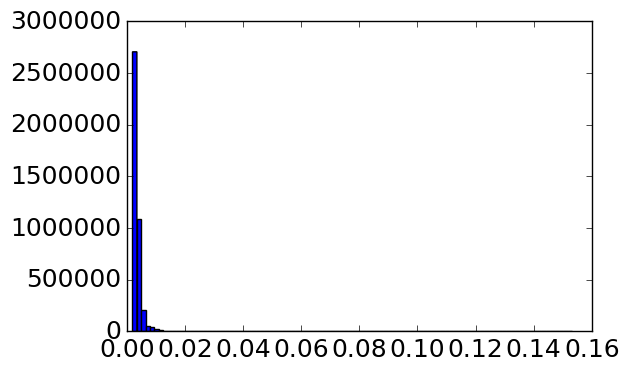

In [47]:
plt.hist(grad_abs[grad_abs>grad_median].flatten(),bins=100);

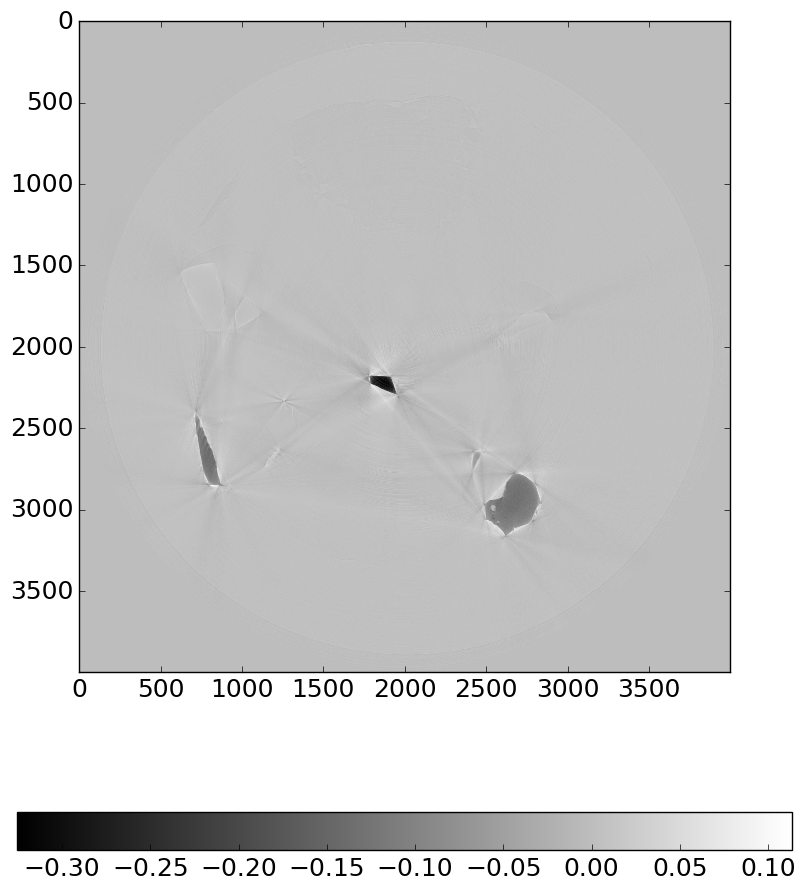

In [58]:
plt.figure(figsize=(10,12))
plt.imshow((bh_images[0]-bh_images[92]), cmap=plt.cm.gray)
plt.colorbar(orientation='horizontal')

In [93]:
from cv2 import medianBlur

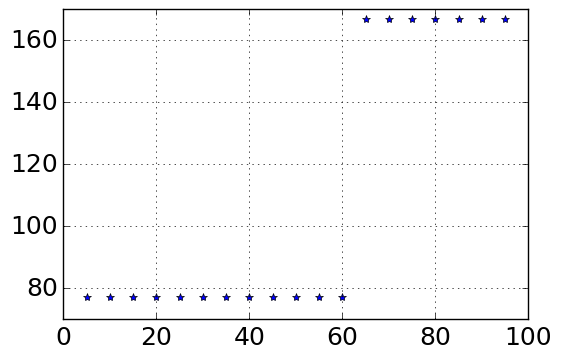